In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/housing.csv")

# Show basic info
df.info()

# Display first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
# Check missing values
df.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

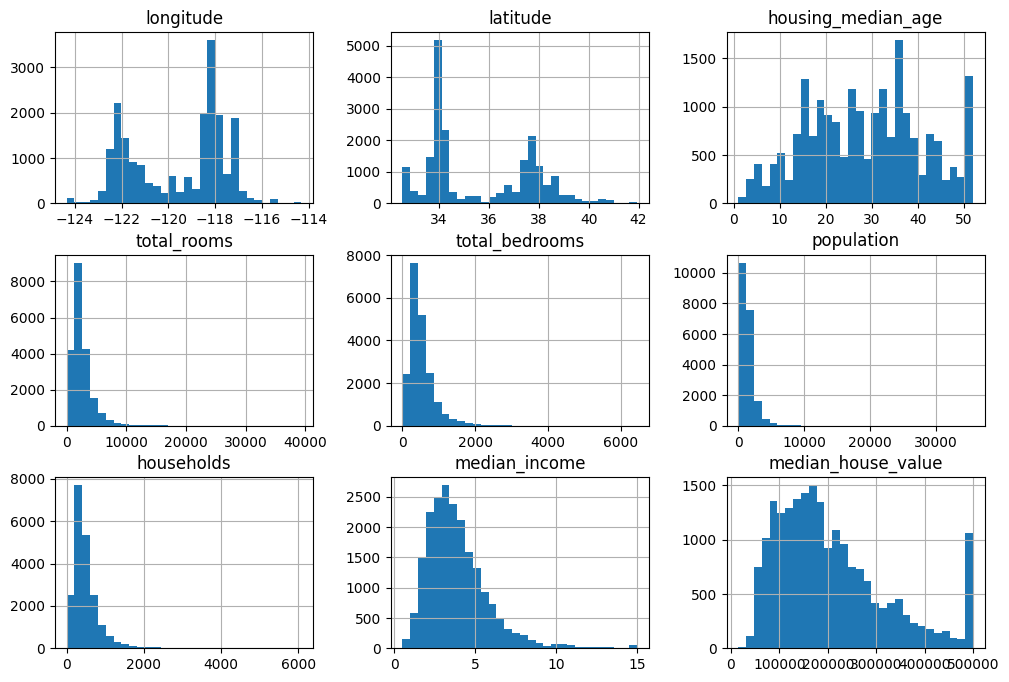

In [3]:
# Plot histograms of all numerical features
df.hist(figsize=(12, 8), bins=30)
plt.show()


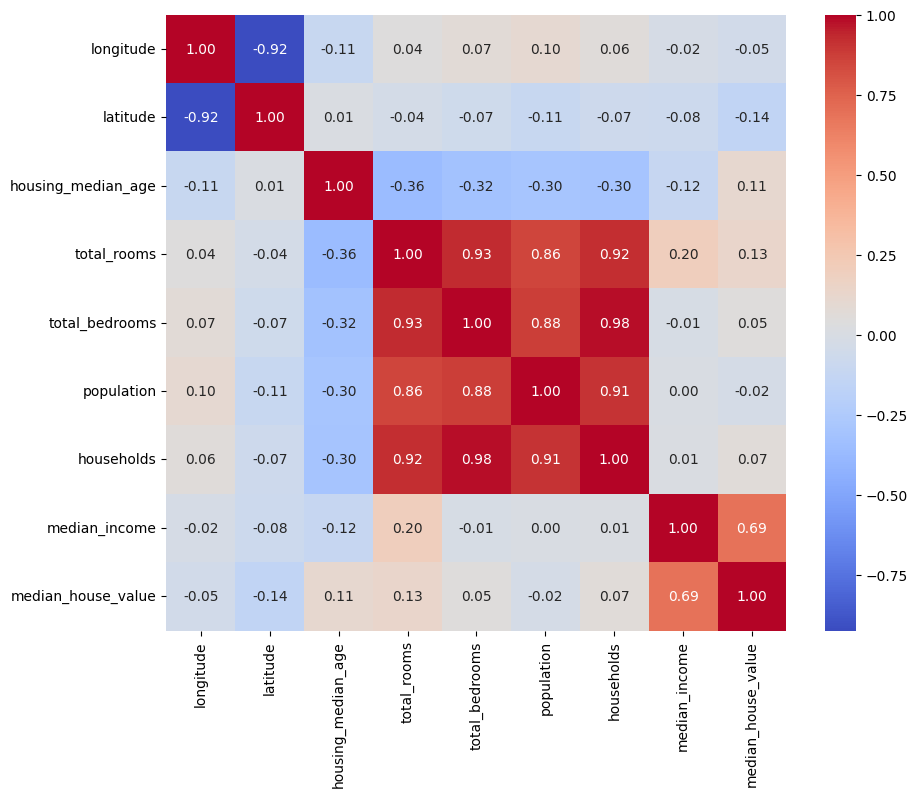

In [5]:
# Compute correlation matrix (only for numeric columns)
corr_matrix = df.select_dtypes(include=["number"]).corr()

# Heatmap visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()



In [6]:
# Fill missing values with median
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)

# Confirm no missing values remain
df.isnull().sum()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_60808\3442582743.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
# Create new engineered features
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

# Check if features were created successfully
df[["rooms_per_household", "bedrooms_per_room", "population_per_household"]].head()


,rooms_per_household,bedrooms_per_room,population_per_household
0,6.984127,0.146591,2.555556
1,6.238137,0.155797,2.109842
2,8.288136,0.129516,2.802260
3,5.817352,0.184458,2.547945
4,6.281853,0.172096,2.181467


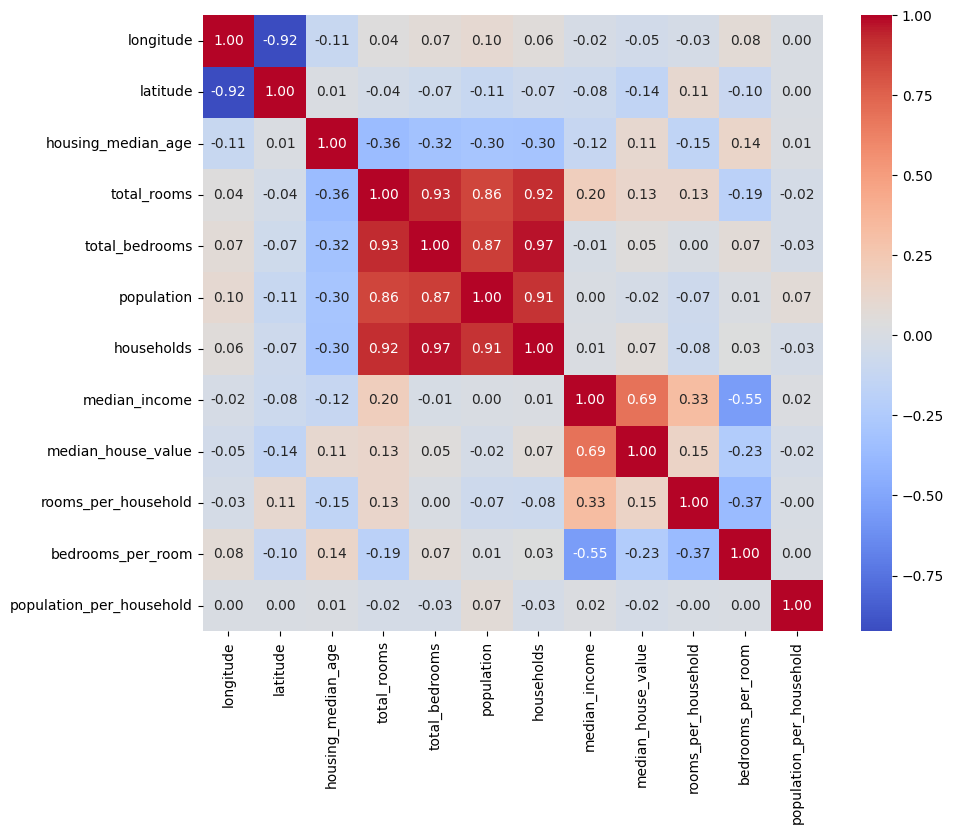

In [8]:
# Compute new correlation matrix
corr_matrix = df.select_dtypes(include=["number"]).corr()

# Visualize it again
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [9]:
# Drop less useful columns
df = df.drop(["total_rooms", "total_bedrooms", "population", "households"], axis=1)

# Check updated dataframe
df.head()


,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [10]:
# Convert categorical feature to numerical format using one-hot encoding
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

# Check if encoding worked
df.head()


,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,False,False,True,False
1,-122.22,37.86,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,False,False,True,False
2,-122.24,37.85,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,False,False,True,False
3,-122.25,37.85,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,False,False,True,False
4,-122.25,37.85,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,False,False,True,False


In [11]:
from sklearn.model_selection import train_test_split

# Define target variable (y) and features (X)
X = df.drop("median_house_value", axis=1)  # Features
y = df["median_house_value"]               # Target

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check dataset sizes
X_train.shape, X_test.shape


((16512, 11), (4128, 11))

In [12]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lin_reg = LinearRegression()

# Train (fit) the model on training data
lin_reg.fit(X_train, y_train)

# Check model coefficients
print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)


Intercept: -2387290.625999576
Coefficients: [-26760.66787767 -24605.64935015    890.05145241  42913.2448979
   3412.8735041  337095.0661596    -345.99958058 -35630.78885811
 139550.01112335   3098.27428952   8497.47910592]


In [13]:
# Predict on test set
y_pred = lin_reg.predict(X_test)

# Show first few predictions
import numpy as np
print("Predicted values:", y_pred[:5])
print("Actual values:", y_test[:5].values)


Predicted values: [ 79381.63905586 110690.33137596 209304.44271986 275509.78332942
 253449.24421684]
Actual values: [ 47700.  45800. 500001. 218600. 278000.]


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 53132.66
Root Mean Squared Error (RMSE): 76530.60
R-squared (R²): 0.5530


In [15]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree model
tree_reg = DecisionTreeRegressor(random_state=42)

# Train the model
tree_reg.fit(X_train, y_train)

# Predict on test set
y_pred_tree = tree_reg.predict(X_test)

# Evaluate Decision Tree model
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Print results
print(f"Decision Tree - Mean Absolute Error (MAE): {mae_tree:.2f}")
print(f"Decision Tree - Root Mean Squared Error (RMSE): {rmse_tree:.2f}")
print(f"Decision Tree - R-squared (R²): {r2_tree:.4f}")


Decision Tree - Mean Absolute Error (MAE): 43006.90
Decision Tree - Root Mean Squared Error (RMSE): 69918.97
Decision Tree - R-squared (R²): 0.6269


In [16]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

# Print results
print("Cross-Validation RMSE Scores:", tree_rmse_scores)
print("Mean RMSE:", tree_rmse_scores.mean())
print("Standard Deviation:", tree_rmse_scores.std())


Cross-Validation RMSE Scores: [62649.52760879 68947.52795118 68386.38381032 70572.42629497
 72032.83906646 68545.59570663 68371.05455224 66628.52444205
 64763.67629007 68955.87956184]
Mean RMSE: 67985.34352845629
Standard Deviation: 2574.0527303811514


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
rf_reg.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_reg.predict(X_test)

# Evaluate Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Random Forest - R-squared (R²): {r2_rf:.4f}")


Random Forest - Mean Absolute Error (MAE): 32021.94
Random Forest - Root Mean Squared Error (RMSE): 50195.90
Random Forest - R-squared (R²): 0.8077


In [18]:
# Perform cross-validation on Random Forest
rf_scores = cross_val_score(rf_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-rf_scores)

# Print results
print("Random Forest Cross-Validation RMSE Scores:", rf_rmse_scores)
print("Mean RMSE:", rf_rmse_scores.mean())
print("Standard Deviation:", rf_rmse_scores.std())


Random Forest Cross-Validation RMSE Scores: [46867.84760722 51004.42595957 49248.13421189 50056.95697575
 52744.56390249 46561.28526107 47234.78961922 50320.32336947
 48466.82252456 49878.0563275 ]
Mean RMSE: 49238.320575873535
Standard Deviation: 1872.381636871232


In [19]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_reg, "../models/random_forest_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [20]:
import joblib
import numpy as np

# Load the saved Random Forest model
model = joblib.load("../models/random_forest_model.pkl")

# Select a random sample from X_test
sample_data = X_test.iloc[:5]  # Taking first 5 rows for testing

# Predict using the loaded model
predictions = model.predict(sample_data)

# Display results
print("Sample Input Data:")
print(sample_data)
print("\nPredicted House Prices:")
print(predictions)



Sample Input Data:
       longitude  latitude  housing_median_age  median_income  \
20046    -119.01     36.06                25.0         1.6812   
3024     -119.46     35.14                30.0         2.5313   
15663    -122.44     37.80                52.0         3.4801   
20484    -118.72     34.28                17.0         5.7376   
9814     -121.93     36.62                34.0         3.7250   

       rooms_per_household  bedrooms_per_room  population_per_household  \
20046             4.192201           0.289037                  3.877437   
3024              5.039384           0.147808                  2.679795   
15663             3.977155           0.113577                  1.360332   
20484             6.163636           0.142576                  3.444444   
9814              5.492991           0.185028                  2.483645   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
20046                    True                   False   
3024                     

In [21]:
print(model.feature_names_in_)


['longitude' 'latitude' 'housing_median_age' 'median_income'
 'rooms_per_household' 'bedrooms_per_room' 'population_per_household'
 'ocean_proximity_INLAND' 'ocean_proximity_ISLAND'
 'ocean_proximity_NEAR BAY' 'ocean_proximity_NEAR OCEAN']


In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf node
}

# Initialize Random Forest
rf_reg = RandomForestRegressor(random_state=42)

# Perform Randomized Search
rf_search = RandomizedSearchCV(
    estimator=rf_reg,
    param_distributions=param_grid,
    n_iter=10,  # Number of random combinations to try
    cv=5,  # Cross-validation folds
    n_jobs=-1,  # Use all available CPUs
    verbose=2
)

# Fit the model on training data
rf_search.fit(X_train, y_train)

# Print the best parameters
print("Best Hyperparameters:", rf_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}


In [23]:
# Train model with the best hyperparameters
best_rf = RandomForestRegressor(
    n_estimators=rf_search.best_params_['n_estimators'],
    max_depth=rf_search.best_params_['max_depth'],
    min_samples_split=rf_search.best_params_['min_samples_split'],
    min_samples_leaf=rf_search.best_params_['min_samples_leaf'],
    random_state=42
)

best_rf.fit(X_train, y_train)

# Evaluate the optimized model
y_pred_best = best_rf.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print results
print(f"Optimized Random Forest - Mean Absolute Error (MAE): {mae_best:.2f}")
print(f"Optimized Random Forest - Root Mean Squared Error (RMSE): {rmse_best:.2f}")
print(f"Optimized Random Forest - R-squared (R²): {r2_best:.4f}")


Optimized Random Forest - Mean Absolute Error (MAE): 31711.81
Optimized Random Forest - Root Mean Squared Error (RMSE): 49303.06
Optimized Random Forest - R-squared (R²): 0.8145


In [25]:
import joblib
joblib.dump(best_rf, "../models/random_forest_optimized.pkl")
print("Optimized model saved successfully!")


Optimized model saved successfully!
